In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

## Load

In [2]:
iris_data = pd.read_csv('C:/Users/IRIS.csv', header=0)

## Preparing dataset

In [3]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [4]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

c:\Users\CONDA\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [14]:
type(y_train)

numpy.ndarray

In [6]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [7]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 78ms/step - loss: 1.0599 - accuracy: 0.4095 - val_loss: 0.8359 - val_accuracy: 0.6222
Epoch 2/30
4/4 [==============================] - 0s 21ms/step - loss: 0.6909 - accuracy: 0.6381 - val_loss: 0.5492 - val_accuracy: 0.6444
Epoch 3/30
4/4 [==============================] - 0s 21ms/step - loss: 0.4846 - accuracy: 0.7333 - val_loss: 0.4620 - val_accuracy: 0.8667
Epoch 4/30
4/4 [==============================] - 0s 21ms/step - loss: 0.4067 - accuracy: 0.8000 - val_loss: 0.3985 - val_accuracy: 0.8667
Epoch 5/30
4/4 [==============================] - 0s 20ms/step - loss: 0.3660 - accuracy: 0.7905 - val_loss: 0.3264 - val_accuracy: 0.9556
Epoch 6/30
4/4 [==============================] - 0s 20ms/step - loss: 0.2747 - accuracy: 0.9143 - val_loss: 0.2720 - val_accuracy: 0.9333
Epoch 7/30
4/4 [==============================] - 0s 20ms/step - loss: 0.2438 - accuracy: 0.9143 - val_loss: 0.2428 - val_accuracy: 0.8889
Epoch 8/30
4/4 [===========

In [9]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.8667


[0.19870275259017944, 0.8666666746139526]

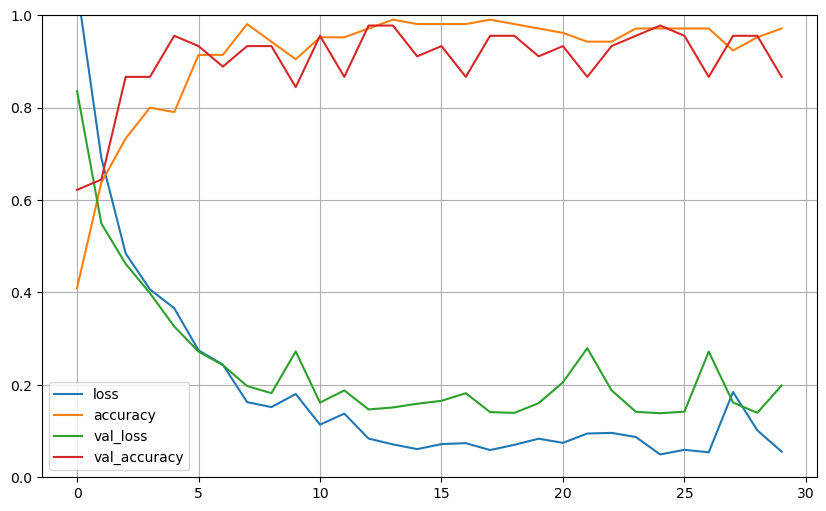

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()